<a href="https://colab.research.google.com/github/ARUNAGIRINATHAN-K/MNIST-Progressive-ANN/blob/main/MNISTipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Data transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Mean and std for MNIST
])

# Load datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 34.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.64MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.26MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.22MB/s]


In [2]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # Input to hidden
        self.fc2 = nn.Linear(128, 10)   # Hidden to output

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate model, loss, optimizer
model = SimpleNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [3]:
def train(model, train_loader, criterion, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Epoch {epoch}, Batch {batch_idx}, Loss: {loss.item():.4f}')

# Train
for epoch in range(1, 6):
    train(model, train_loader, criterion, optimizer, epoch)

Epoch 1, Batch 0, Loss: 2.3232
Epoch 1, Batch 100, Loss: 0.3703
Epoch 1, Batch 200, Loss: 0.3344
Epoch 1, Batch 300, Loss: 0.1416
Epoch 1, Batch 400, Loss: 0.1859
Epoch 1, Batch 500, Loss: 0.1638
Epoch 1, Batch 600, Loss: 0.3232
Epoch 1, Batch 700, Loss: 0.1764
Epoch 1, Batch 800, Loss: 0.1918
Epoch 1, Batch 900, Loss: 0.0694
Epoch 2, Batch 0, Loss: 0.1130
Epoch 2, Batch 100, Loss: 0.0958
Epoch 2, Batch 200, Loss: 0.0953
Epoch 2, Batch 300, Loss: 0.1349
Epoch 2, Batch 400, Loss: 0.0336
Epoch 2, Batch 500, Loss: 0.0170
Epoch 2, Batch 600, Loss: 0.1661
Epoch 2, Batch 700, Loss: 0.1419
Epoch 2, Batch 800, Loss: 0.0891
Epoch 2, Batch 900, Loss: 0.1242
Epoch 3, Batch 0, Loss: 0.0896
Epoch 3, Batch 100, Loss: 0.0991
Epoch 3, Batch 200, Loss: 0.0550
Epoch 3, Batch 300, Loss: 0.0491
Epoch 3, Batch 400, Loss: 0.0884
Epoch 3, Batch 500, Loss: 0.1607
Epoch 3, Batch 600, Loss: 0.0911
Epoch 3, Batch 700, Loss: 0.0406
Epoch 3, Batch 800, Loss: 0.1324
Epoch 3, Batch 900, Loss: 0.0497
Epoch 4, Batch 0

In [4]:
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            total += target.size(0)
    accuracy = 100. * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
    return accuracy

test(model, test_loader)

Test Accuracy: 97.75%


97.75

In [5]:
class DeeperNet(nn.Module):
    def __init__(self):
        super(DeeperNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)   # New hidden layer
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Re-instantiate
model = DeeperNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Switch to Adam for faster convergence

# Train and test (reuse loops above)
for epoch in range(1, 6):
    train(model, train_loader, criterion, optimizer, epoch)
test(model, test_loader)

Epoch 1, Batch 0, Loss: 2.3183
Epoch 1, Batch 100, Loss: 0.1690
Epoch 1, Batch 200, Loss: 0.2235
Epoch 1, Batch 300, Loss: 0.2376
Epoch 1, Batch 400, Loss: 0.1622
Epoch 1, Batch 500, Loss: 0.3947
Epoch 1, Batch 600, Loss: 0.1673
Epoch 1, Batch 700, Loss: 0.4160
Epoch 1, Batch 800, Loss: 0.2620
Epoch 1, Batch 900, Loss: 0.1419
Epoch 2, Batch 0, Loss: 0.0712
Epoch 2, Batch 100, Loss: 0.0267
Epoch 2, Batch 200, Loss: 0.2643
Epoch 2, Batch 300, Loss: 0.0809
Epoch 2, Batch 400, Loss: 0.0401
Epoch 2, Batch 500, Loss: 0.1064
Epoch 2, Batch 600, Loss: 0.1161
Epoch 2, Batch 700, Loss: 0.0358
Epoch 2, Batch 800, Loss: 0.0958
Epoch 2, Batch 900, Loss: 0.1034
Epoch 3, Batch 0, Loss: 0.0754
Epoch 3, Batch 100, Loss: 0.1674
Epoch 3, Batch 200, Loss: 0.0377
Epoch 3, Batch 300, Loss: 0.0951
Epoch 3, Batch 400, Loss: 0.0857
Epoch 3, Batch 500, Loss: 0.0283
Epoch 3, Batch 600, Loss: 0.0330
Epoch 3, Batch 700, Loss: 0.1063
Epoch 3, Batch 800, Loss: 0.0139
Epoch 3, Batch 900, Loss: 0.0590
Epoch 4, Batch 0

97.3

In [6]:
class AdvancedNet(nn.Module):
    def __init__(self):
        super(AdvancedNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.bn1 = nn.BatchNorm1d(128)  # Normalize hidden layer 1
        self.dropout1 = nn.Dropout(0.2)

        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)   # Normalize hidden layer 2
        self.dropout2 = nn.Dropout(0.2)

        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        x = self.bn1(x)
        x = torch.relu(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = torch.relu(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        return x

# Re-instantiate with SGD + scheduler for fine-tuning
model = AdvancedNet().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)  # Learning rate decay

# Train with scheduler
for epoch in range(1, 10):  # More epochs
    train(model, train_loader, criterion, optimizer, epoch)
    scheduler.step()
test(model, test_loader)

Epoch 1, Batch 0, Loss: 2.5945
Epoch 1, Batch 100, Loss: 0.5856
Epoch 1, Batch 200, Loss: 0.4086
Epoch 1, Batch 300, Loss: 0.2626
Epoch 1, Batch 400, Loss: 0.4631
Epoch 1, Batch 500, Loss: 0.2582
Epoch 1, Batch 600, Loss: 0.2633
Epoch 1, Batch 700, Loss: 0.2135
Epoch 1, Batch 800, Loss: 0.2004
Epoch 1, Batch 900, Loss: 0.1538
Epoch 2, Batch 0, Loss: 0.1729
Epoch 2, Batch 100, Loss: 0.2069
Epoch 2, Batch 200, Loss: 0.1949
Epoch 2, Batch 300, Loss: 0.2521
Epoch 2, Batch 400, Loss: 0.2152
Epoch 2, Batch 500, Loss: 0.1771
Epoch 2, Batch 600, Loss: 0.3203
Epoch 2, Batch 700, Loss: 0.1814
Epoch 2, Batch 800, Loss: 0.2191
Epoch 2, Batch 900, Loss: 0.0518
Epoch 3, Batch 0, Loss: 0.0955
Epoch 3, Batch 100, Loss: 0.0326
Epoch 3, Batch 200, Loss: 0.2631
Epoch 3, Batch 300, Loss: 0.0349
Epoch 3, Batch 400, Loss: 0.1789
Epoch 3, Batch 500, Loss: 0.1109
Epoch 3, Batch 600, Loss: 0.0456
Epoch 3, Batch 700, Loss: 0.1594
Epoch 3, Batch 800, Loss: 0.1512
Epoch 3, Batch 900, Loss: 0.0431
Epoch 4, Batch 0

97.59

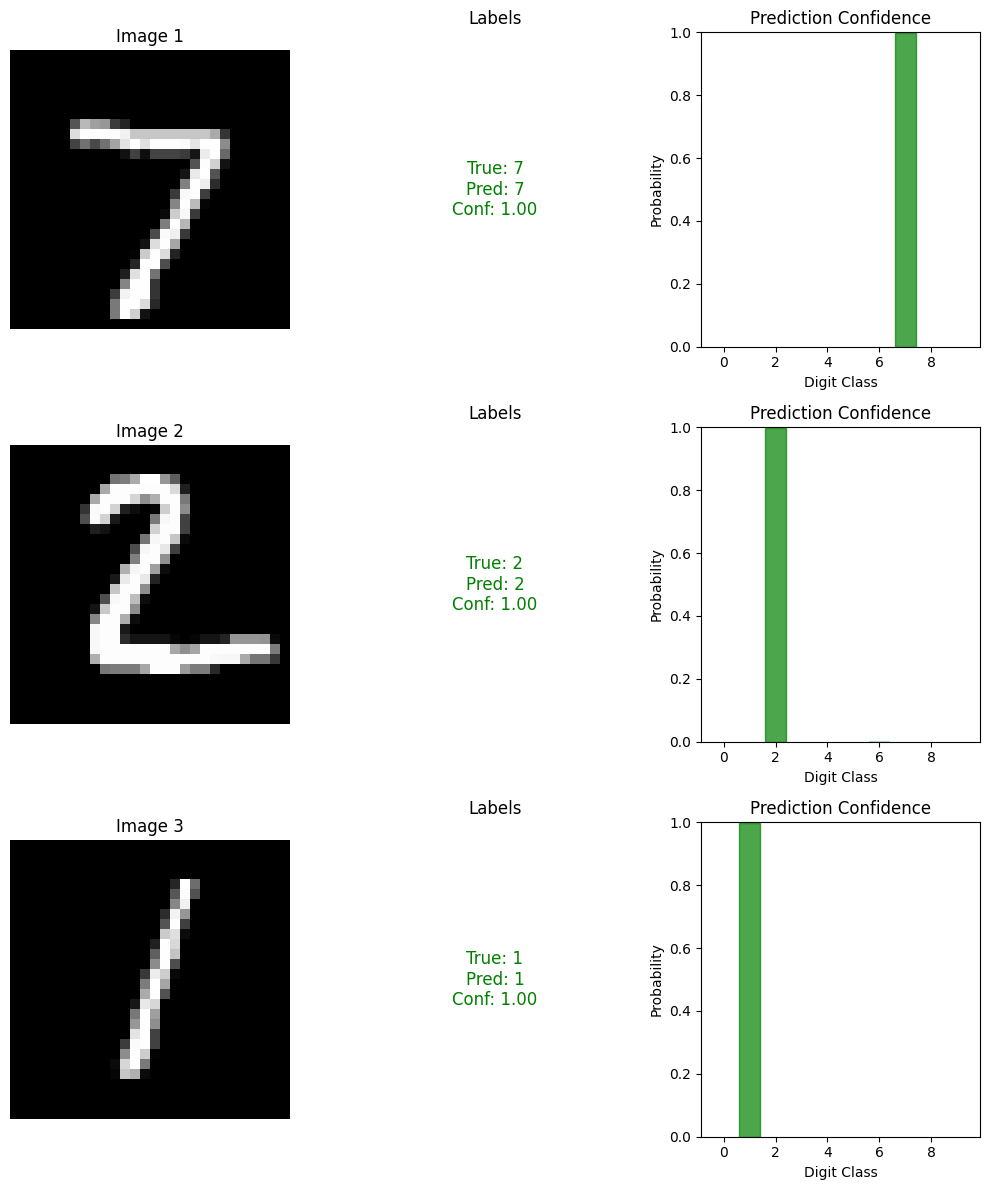

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_single_prediction(model, test_loader, device, num_images=1):
    """
    Plot num_images test samples with true vs predicted labels.
    """
    model.eval()
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    images, labels = images.to(device), labels.to(device)

    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        confidence, _ = torch.max(probabilities, 1)

    fig = plt.figure(figsize=(10, 4 * num_images))

    for idx in range(num_images):
        ax = fig.add_subplot(num_images, 3, 3*idx + 1)
        img = images[idx].cpu().squeeze()  # Remove batch and channel dims
        ax.imshow(img, cmap='gray')
        ax.set_title(f'Image {idx+1}')
        ax.axis('off')

        ax = fig.add_subplot(num_images, 3, 3*idx + 2)
        true_label = labels[idx].item()
        pred_label = predicted[idx].item()
        conf = confidence[idx].item()
        color = 'green' if true_label == pred_label else 'red'
        ax.text(0.5, 0.5, f'True: {true_label}\nPred: {pred_label}\nConf: {conf:.2f}',
                ha='center', va='center', fontsize=12, color=color, transform=ax.transAxes)
        ax.set_title('Labels')
        ax.axis('off')

        ax = fig.add_subplot(num_images, 3, 3*idx + 3)
        # Show probability distribution
        probs = probabilities[idx].cpu().numpy()
        classes = range(10)
        bars = ax.bar(classes, probs, color='skyblue', alpha=0.7)
        # Highlight true and predicted
        bars[true_label].set_color('green' if true_label == pred_label else 'orange')
        bars[pred_label].set_color('red' if true_label != pred_label else 'green')
        ax.set_xlabel('Digit Class')
        ax.set_ylabel('Probability')
        ax.set_title('Prediction Confidence')
        ax.set_ylim(0, 1)

    plt.tight_layout()
    plt.show()

# Usage - plot first 3 test images
plot_single_prediction(model, test_loader, device, num_images=3)

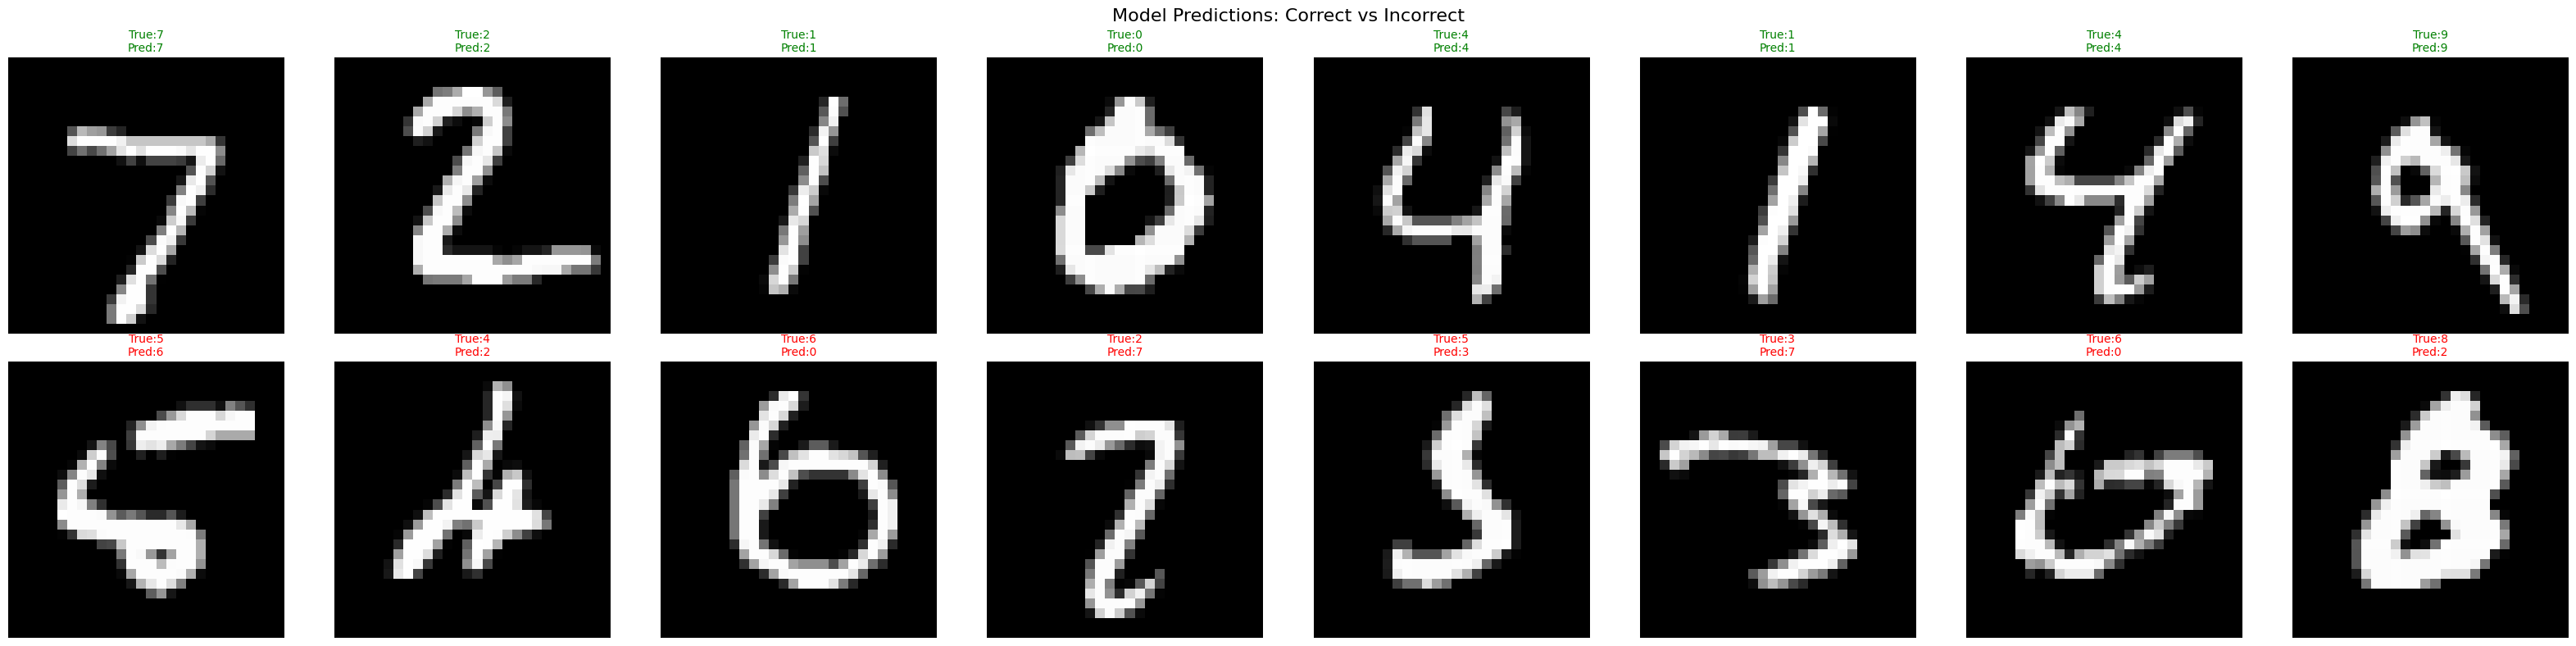

In [8]:
def plot_prediction_grid(model, test_loader, device, num_images_per_row=8):
    """
    Plot a grid of predictions: correct on top, incorrect below.
    """
    model.eval()
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    images, labels = images.to(device), labels.to(device)

    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    # Separate correct and incorrect predictions
    correct_mask = predicted.eq(labels)
    incorrect_mask = ~correct_mask

    correct_indices = torch.nonzero(correct_mask).squeeze()
    incorrect_indices = torch.nonzero(incorrect_mask).squeeze()

    # Limit to available images
    num_correct_to_show = min(num_images_per_row, len(correct_indices))
    num_incorrect_to_show = min(num_images_per_row, len(incorrect_indices))

    fig, (ax1, ax2) = plt.subplots(2, num_images_per_row,
                                   figsize=(4*num_images_per_row, 8))
    fig.suptitle('Model Predictions: Correct vs Incorrect', fontsize=16)

    # Plot correct predictions (top row)
    for i in range(num_correct_to_show):
        idx = correct_indices[i].item()
        img = images[idx].cpu().squeeze()
        true_label = labels[idx].item()
        pred_label = predicted[idx].item()

        ax1[i].imshow(img, cmap='gray')
        ax1[i].set_title(f'True:{true_label}\nPred:{pred_label}', color='green', fontsize=10)
        ax1[i].axis('off')

    # Hide unused subplot positions
    for i in range(num_correct_to_show, num_images_per_row):
        ax1[i].axis('off')

    # Plot incorrect predictions (bottom row)
    for i in range(num_incorrect_to_show):
        idx = incorrect_indices[i].item()
        img = images[idx].cpu().squeeze()
        true_label = labels[idx].item()
        pred_label = predicted[idx].item()

        ax2[i].imshow(img, cmap='gray')
        ax2[i].set_title(f'True:{true_label}\nPred:{pred_label}', color='red', fontsize=10)
        ax2[i].axis('off')

    # Hide unused subplot positions
    for i in range(num_incorrect_to_show, num_images_per_row):
        ax2[i].axis('off')

    plt.tight_layout()
    plt.show()

# Usage
plot_prediction_grid(model, test_loader, device, num_images_per_row=8)

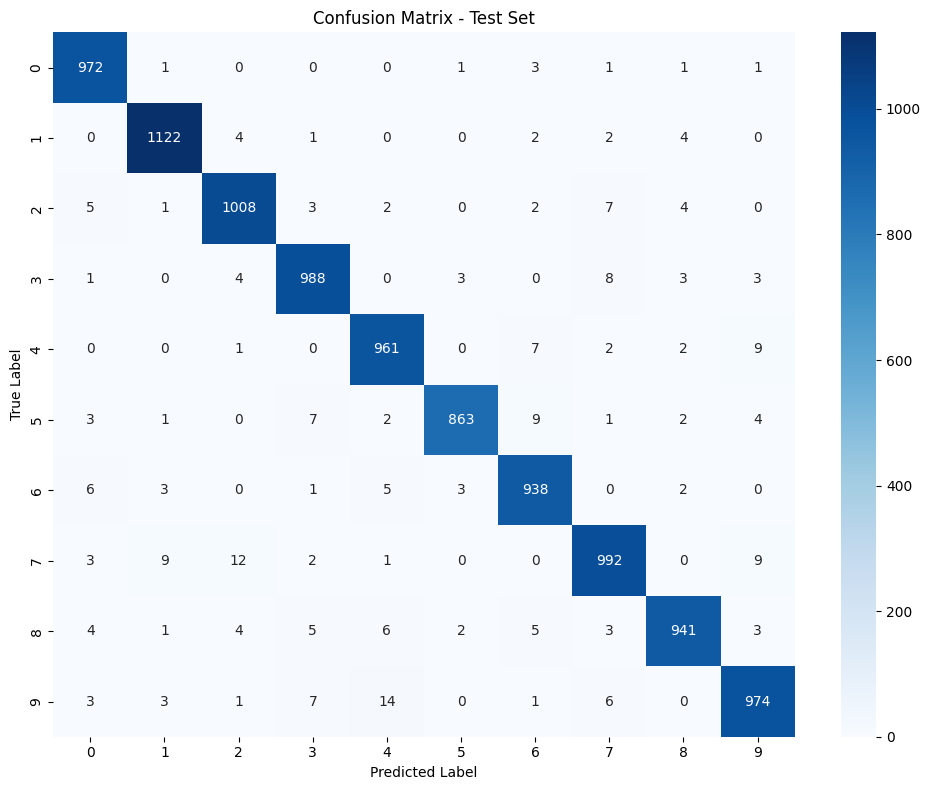


Accuracy per class:
Digit 0: 0.992 (991/980)
Digit 1: 0.989 (988/1135)
Digit 2: 0.977 (976/1032)
Digit 3: 0.978 (978/1010)
Digit 4: 0.979 (978/982)
Digit 5: 0.967 (967/892)
Digit 6: 0.979 (979/958)
Digit 7: 0.965 (964/1028)
Digit 8: 0.966 (966/974)
Digit 9: 0.965 (965/1009)


In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, test_loader, device):
    """
    Plot confusion matrix showing true vs predicted class distribution.
    """
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)

            all_preds.extend(pred.cpu().numpy().flatten())
            all_labels.extend(target.cpu().numpy().flatten())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    class_names = [str(i) for i in range(10)]

    # Plot with seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix - Test Set')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Print accuracy per class
    class_accuracy = cm.diagonal() / cm.sum(axis=1)
    print("\nAccuracy per class:")
    for i, acc in enumerate(class_accuracy):
        print(f"Digit {i}: {acc:.3f} ({int(acc * len(all_labels)/10)}/{int(cm.sum(axis=1)[i])})")

    return cm

# Usage
cm = plot_confusion_matrix(model, test_loader, device)

In [10]:
def compare_models_predictions(models_dict, test_loader, device, num_samples=6):
    """
    Compare predictions from multiple models side-by-side.

    models_dict: {'Model Name': model_instance}
    """
    model.eval()  # Ensure current model is in eval mode
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    images = images.to(device)
    labels = labels.to(device)

    # Get predictions from all models
    predictions = {}
    confidences = {}

    for name, model in models_dict.items():
        model.eval()
        with torch.no_grad():
            outputs = model(images)
            _, pred = torch.max(outputs, 1)
            probs = torch.nn.functional.softmax(outputs, dim=1)
            confidence, _ = torch.max(probs, 1)

            predictions[name] = pred
            confidences[name] = confidence

    # Plot comparison
    fig, axes = plt.subplots(num_samples, len(models_dict) + 1,
                           figsize=(4*(len(models_dict) + 1), 4*num_samples))

    if num_samples == 1:
        axes = axes.reshape(1, -1)

    for i in range(num_samples):
        # Original image
        img = images[i].cpu().squeeze()
        true_label = labels[i].item()

        axes[i, 0].imshow(img, cmap='gray')
        axes[i, 0].set_title(f'True: {true_label}', fontsize=12)
        axes[i, 0].axis('off')

        # Model predictions
        for j, (name, model) in enumerate(models_dict.items()):
            pred_label = predictions[name][i].item()
            conf = confidences[name][i].item()
            color = 'green' if pred_label == true_label else 'red'

            axes[i, j+1].imshow(img, cmap='gray')
            axes[i, j+1].set_title(f'{name}\n{pred_label}\n{conf:.2f}',
                                  color=color, fontsize=10)
            axes[i, j+1].axis('off')

    plt.suptitle('Model Comparison: True vs Predicted Labels', fontsize=16)
    plt.tight_layout()
    plt.show()

# Usage - compare different architectures
models_to_compare = {
    'SimpleNet': SimpleNet().to(device),  # You'd need to load trained weights
    'DeeperNet': DeeperNet().to(device),
    'AdvancedNet': model  # Current trained model
}

# Note: For fair comparison, load pre-trained weights for each model
# compare_models_predictions(models_to_compare, test_loader, device, num_samples=4)

In [11]:
def plot_training_history(train_losses, test_accuracies):
    """
    Plot training loss and test accuracy over epochs.
    """
    epochs = range(1, len(train_losses) + 1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Training loss
    ax1.plot(epochs, train_losses, 'b-', marker='o', linewidth=2, markersize=6)
    ax1.set_title('Training Loss Over Epochs')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Cross Entropy Loss')
    ax1.grid(True, alpha=0.3)

    # Test accuracy
    ax2.plot(epochs, test_accuracies, 'r-', marker='s', linewidth=2, markersize=6)
    ax2.set_title('Test Accuracy Over Epochs')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_ylim(0, 100)
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Example usage - track during training
train_losses = []
test_accuracies = []

# Modified training loop to track metrics
def train_with_tracking(model, train_loader, test_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(1, epochs + 1):
        epoch_loss = 0
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        # Track average epoch loss
        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Test accuracy
        accuracy = test(model, test_loader)  # Reuse our test function
        test_accuracies.append(accuracy)

        print(f'Epoch {epoch}: Loss={avg_loss:.4f}, Accuracy={accuracy:.2f}%')

# Run training with tracking
# train_with_tracking(model, train_loader, test_loader, criterion, optimizer, epochs=5)

# Plot results
# plot_training_history(train_losses, test_accuracies)

=== Visualizing Predictions ===

1. Individual Predictions:


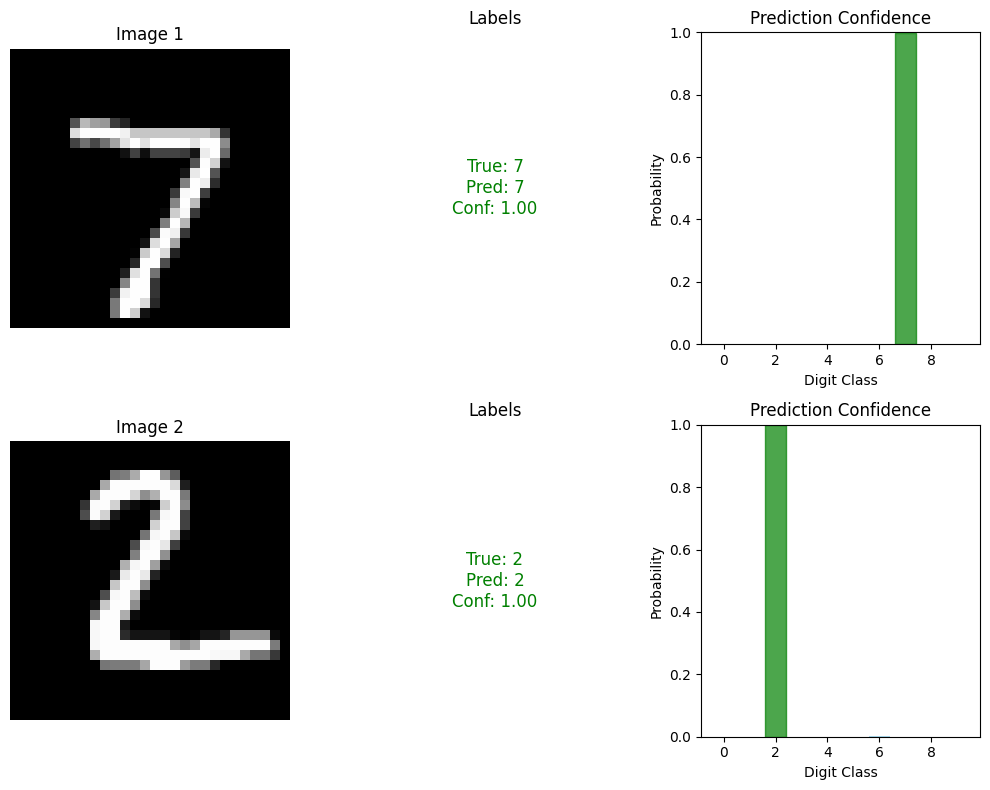


2. Correct vs Incorrect Grid:


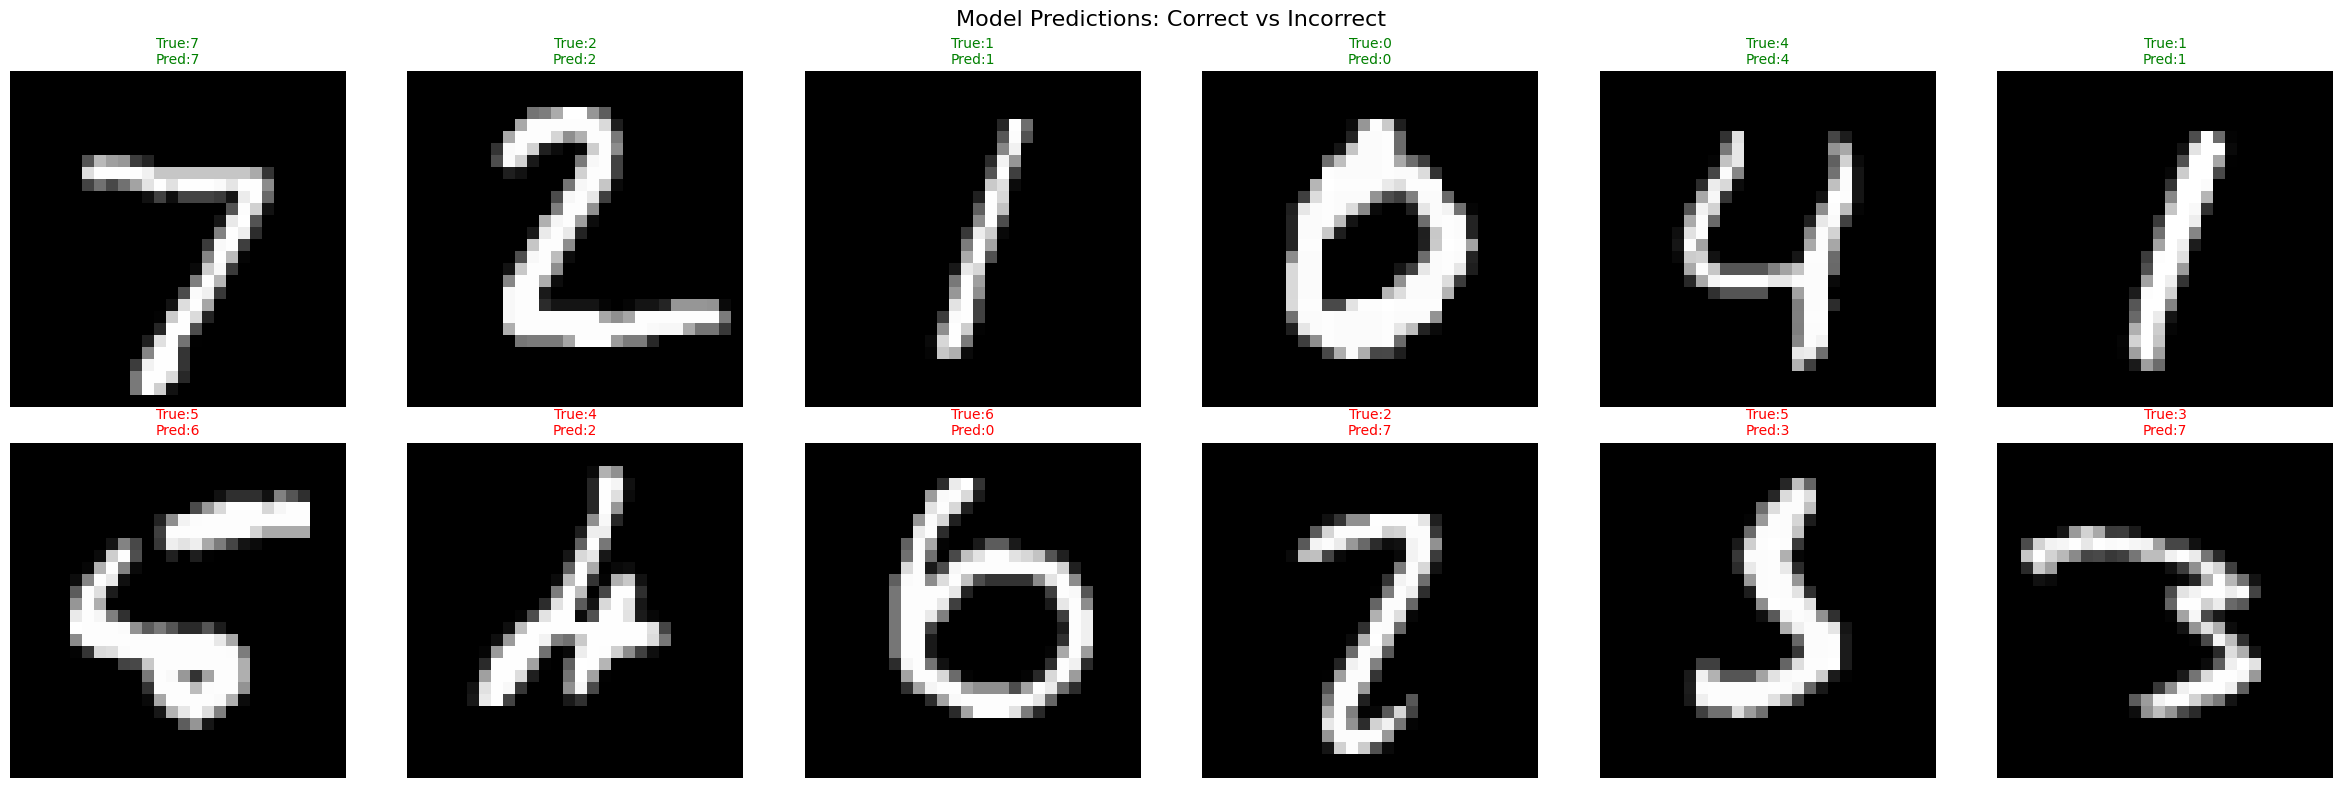


3. Confusion Matrix:


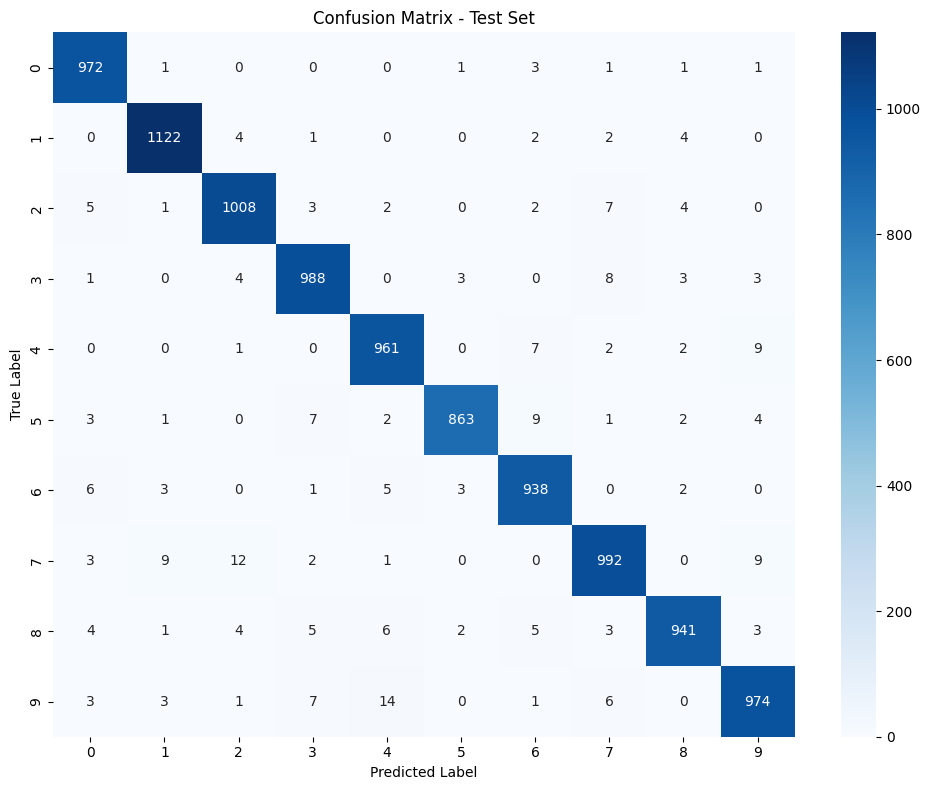


Accuracy per class:
Digit 0: 0.992 (991/980)
Digit 1: 0.989 (988/1135)
Digit 2: 0.977 (976/1032)
Digit 3: 0.978 (978/1010)
Digit 4: 0.979 (978/982)
Digit 5: 0.967 (967/892)
Digit 6: 0.979 (979/958)
Digit 7: 0.965 (964/1028)
Digit 8: 0.966 (966/974)
Digit 9: 0.965 (965/1009)

4. Training Progress: Run train_with_tracking() to generate this plot


In [12]:
# After training your model...

print("=== Visualizing Predictions ===")

# 1. Single image predictions
print("\n1. Individual Predictions:")
plot_single_prediction(model, test_loader, device, num_images=2)

# 2. Prediction grid
print("\n2. Correct vs Incorrect Grid:")
plot_prediction_grid(model, test_loader, device, num_images_per_row=6)

# 3. Confusion matrix
print("\n3. Confusion Matrix:")
cm = plot_confusion_matrix(model, test_loader, device)

# 4. Training history (if you tracked it)
if len(train_losses) > 0:
    print("\n4. Training Progress:")
    plot_training_history(train_losses, test_accuracies)
else:
    print("\n4. Training Progress: Run train_with_tracking() to generate this plot")

plt.show()